# Tensorflow

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import tensorflow as tf
import tensorflow.keras as keras

## Keras

In [5]:
Dense = keras.layers.Dense

We can consider a DL model as just a black box with a bunch of unnown parameters. For example, when the output is a Dense layer with just one node, the entire network model is just doing some form of regression. If we use a single node with a sigmoid activation function, the model is essentially doing logistic regression.

### A single unit with sigmoid activation function

![img](https://ars.els-cdn.com/content/image/1-s2.0-S0038092X1200326X-gr1.jpg)

In [6]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

In [7]:
X_train.shape

(981, 11)

In [8]:
model01 = keras.models.Sequential([
    Dense(1, 
          activation='sigmoid', 
          input_shape=X_train.shape[1:]),
])

In [9]:
model01.compile(loss="binary_crossentropy", 
                optimizer="sgd", 
                metrics=["accuracy"])

In [10]:
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [11]:
model01.layers

In [12]:
model01.layers[0].name

'dense'

In [13]:
model01.layers[0].activation

<function tensorflow.python.keras.activations.sigmoid(x)>

In [14]:
hist = model01.fit(X_train, 
                   y_train,
                   epochs=20,
                   verbose=0,
                   validation_split=0.2)

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(hist.history)

In [17]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.029838,0.371173,0.959598,0.380711
1,0.922509,0.409439,0.866757,0.431472
2,0.833006,0.436224,0.791162,0.467005
3,0.759757,0.474490,0.730747,0.532995
4,0.700539,0.536990,0.684353,0.553299


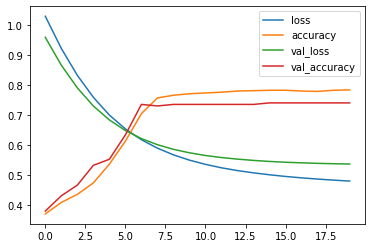

In [18]:
df.plot()
pass

In [19]:
model01.evaluate(X_test, y_test)

11/11 [==============================] - 0s 591us/step - loss: 0.4566 - accuracy: 0.8293


[0.4565536081790924, 0.8292682766914368]

In [20]:
k = 5
np.c_[model01.predict(X_test.iloc[:k, :]), y_test[:k]]

array([[0.71404094, 0.        ],
       [0.17881006, 0.        ],
       [0.56976336, 1.        ],
       [0.33437088, 1.        ],
       [0.87005341, 1.        ]])

### Saving and loading model weights

In [21]:
model01.save('titanic.h5')

In [22]:
model011A = keras.models.load_model('titanic.h5')

In [23]:
model011A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### Logistic regression replicates results

In [24]:
import h5py

In [25]:
fh = h5py.File('titanic.h5', 'r') 

In [26]:
fh.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [27]:
fh['model_weights'].keys()

<KeysViewHDF5 ['dense']>

In [28]:
fh['model_weights'].get('dense').get('dense').keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [29]:
bias = fh['model_weights'].get('dense').get('dense').get('bias:0')
bias

<HDF5 dataset "bias:0": shape (1,), type "<f4">

In [30]:
wts = fh['model_weights'].get('dense').get('dense').get('kernel:0')
wts

<HDF5 dataset "kernel:0": shape (11, 1), type "<f4">

In [31]:
bias[:]

array([-0.4318819], dtype=float32)

In [32]:
wts[:]

array([[-0.26382327],
       [ 0.11888377],
       [ 1.0947229 ],
       [-0.20582937],
       [-0.35638043],
       [ 0.02472745],
       [ 0.10281957],
       [ 0.03278307],
       [-0.25210753],
       [-0.26847404],
       [ 0.09856348]], dtype=float32)

In [33]:
logodds = bias[:] + X_test.iloc[:5, :] @ wts[:]
odds = np.exp(logodds)
p_lr = odds/(1 + odds)

In [34]:
p_nn = model01.predict(X_test.iloc[:5])

In [35]:
pd.DataFrame(np.c_[p_lr, p_nn], columns=['lr', 'nn'])

,lr,nn
0,0.714041,0.714041
1,0.178810,0.178810
2,0.569763,0.569763
3,0.334371,0.334371
4,0.870053,0.870053


In [36]:
fh.close()

## Building blocks

A `keras` model is composed of **layers**. Each layer has its own **activation** function. Each layer also has its own biases and weights. To set initial random weights, there are several possible strategies known as **initializers**. To fit the model, you need to specify a **loss** function. During training, the **optimizer** finds biases and weights that minimize the loss function. Model performance is evaluated using **metrics**.

Commonly used versions of these classes or functions come built-in with `keras`.

![img](https://miro.medium.com/proxy/1*YL2a2dbDQ5754h_ktDj8mQ.png)

### Layers

In [37]:
[x for x in dir(keras.layers) if
 x[0].isupper() and 
 not x.startswith('_')]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'Global

### Activations

In [38]:
[x for x in dir(keras.activations) if
 x[0].islower() and 
 not x.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

#### Example

In [39]:
x = tf.range(-10, 10, 0.1)
y = keras.activations.sigmoid(x)

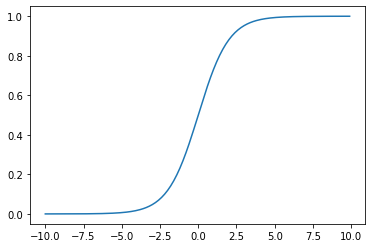

In [40]:
plt.plot(x, y);

### Initializers

In [41]:
[x for x in dir(keras.initializers) if 
 x[0].isupper() and 
 not x.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros']

#### Example

In [42]:
init = keras.initializers.LecunNormal(seed=0)
init(shape=(2,3)).numpy()

array([[-1.3641988 , -0.38696545, -0.532354  ],
       [ 0.06994588, -0.21366763,  0.07270983]], dtype=float32)

### Losses

In [43]:
[x for x in dir(keras.losses) if
 x[0].isupper() and 
 not x.startswith('_')]

['BinaryCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge']

#### Example

In [44]:
loss = keras.losses.BinaryCrossentropy()

In [45]:
y_true = [1,0,0,1]
y_pred = [0.9, 0.2, 0.3, 0.8]
loss(y_true, y_pred).numpy()

0.2270805

### Metrics

In [46]:
[x for x in dir(keras.metrics) if
 x[0].isupper() and 
 not x.startswith('_')]

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives']

#### Example

In [47]:
metric = keras.metrics.Accuracy()

In [48]:
metric.reset_states()

In [49]:
metric.update_state(
    [[1], [2], [3]],
    [[1], [1], [3]]
)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [50]:
metric.result().numpy()

0.6666667

### Optimizers

In [51]:
[x for x in dir(keras.optimizers) if
 x[0].isupper() and 
 not x.startswith('_')]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD']

#### Example

In [52]:
opt = keras.optimizers.Adam(learning_rate=0.1)

In [53]:
v = tf.Variable(10.0)
loss = lambda: v**2/2.0
n_steps = opt.minimize(loss, [v]).numpy()

In [54]:
v.numpy()

9.9

In [55]:
n_steps = opt.minimize(loss, [v]).numpy()

In [56]:
v.numpy()

9.800028

In [57]:
n_steps

2

### Tensorflow Datasets Project

Makes it simple to download standard datasets for deep learning.

- [List of datasets](https://www.tensorflow.org/datasets/catalog/overview)

In [58]:
! python3 -m pip install --quiet tensorflow-datasets

In [59]:
import tensorflow_datasets as tfds

In [60]:
ds, info = tfds.load(name='fashion_mnist', 
                     as_supervised=True, 
                     with_info=True)

In [61]:
ds

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [62]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [63]:
X_train, X_test = ds['train'], ds['test']

In [64]:
#### Displaying the dataset

In [65]:
tfds.as_dataframe(X_train.take(5), info)

,image,label
0,,2 (Pullover)
1,,1 (Trouser)
2,,8 (Bag)
3,,4 (Coat)
4,,1 (Trouser)


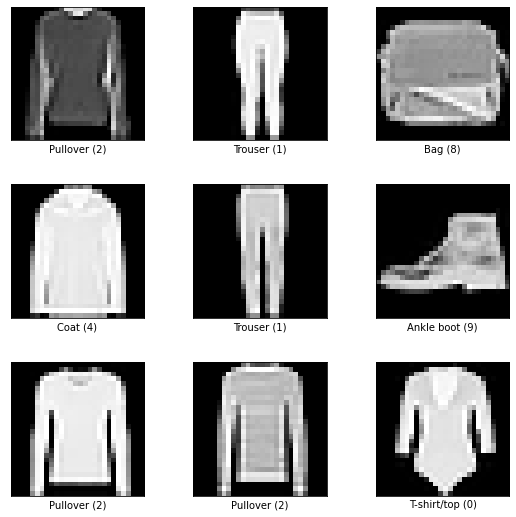

In [66]:
tfds.show_examples(X_train, info);

#### Feed into deep learning pipeline

The data is ready to be fed to a `keras` model.

Coming in next lecture.